In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import cleantexts


import re

import string 

import unicodedata

import nltk

from nltk.stem import PorterStemmer

from nltk.tokenize import sent_tokenize, word_tokenize

from nltk.corpus import wordnet as wn

from nltk.stem.wordnet import WordNetLemmatizer

from nltk import word_tokenize, pos_tag

from collections import defaultdict

from nltk.util import everygrams

stopwords = nltk.corpus.stopwords.words('english')



from time import time
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation
from sklearn.model_selection import StratifiedShuffleSplit


import nltk

In [2]:
data_em_01= pd.read_csv("Data-Emotion-01.csv") # importation des données sous forme d'un tableau pandas
data_em_01 # visualization du tableau

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [3]:
data_em_01['clean_content']= data_em_01.Text.str.lower()
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r"(http|@)\S+", "")
# Remove repetitions
patterdata_em_01n = re.compile(r"(.)\1{2,}", re.DOTALL)
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(patterdata_em_01n, r"\1")
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r"::", ": :")
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r"’", "'")
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r"[^a-z\':_]", " ")

data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r"(can't|cannot)", 'can not')
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r"n't", 'not')
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r"didnt",'did not')
    #data_em_20['content'] = data_em_20['content'].str.replace(r"im",'i am')
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r"i'm",'i am')
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r"ive",' i have')
    # Remove repetitions
pattern1 = re.compile(r'https?:\/\/.*[\r\n]*', re.MULTILINE)
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(pattern1, r"\' '")


data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r'\<a href', ' ')
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r'&amp;', '') 
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ')
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r'<br />', ' ')
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(r'\'', ' ')
data_em_01['clean_content'] = data_em_01['clean_content'].str.strip()
data_em_01['clean_content'] = data_em_01['clean_content'].str.replace(' +', ' ')
data_em_01['clean_content'] = data_em_01['clean_content'].apply(lambda x: x.strip())

In [4]:
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.lancaster import LancasterStemmer


tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
stop_words = set(stopwords.words('english') + list(string.punctuation))

stemmer = LancasterStemmer()

regex_link = r'https?:\/\/.*\/\w*'
regex_ticker = r'\$\w*'
regex_punc = r'[{}]'.format(string.punctuation)
regex_rep = re.compile(r"(.)\1{2,}", re.DOTALL)
    #""" enleve la répétitions du caractère dans un mot """
    #pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
 #sentence = regex_rep.sub(r"\1",sentence)   
# TODO: consider keeping/handling punctuation (and emoticons)


def valid_string(word):
    """Remove punctuation, stop words, and small words"""
     
    if word in stop_words:
        # remove stop words or punctuations
        return False
    if len(word) <= 2:
        # remove empty or very small words
        return False
    return True


def process_sentence(sentence):
    """Remove links, tickers, and tokenize sentence"""
    """Transform short negation form"""

    # remove links
    #sentence = re.sub(regex_link, '', sentence)
    # remove tickers
    #sentence = re.sub(regex_ticker, '', sentence)

    return tokenizer.tokenize(sentence.lower().strip())




def process_word_stem(word):
    """Remove all punctuation and stem words"""
   # word = re.sub(regex_punc, '', word)
    return stemmer.stem(word)
def process_word(word):
    """Remove all punctuation and stem words"""
   # word = re.sub(regex_punc, '', word)
    return word

def clean_sentence(sentence):
    """Clean a sentence by processesing and reforming all the words in it"""

    return ' '.join([process_word(word) for word in process_sentence(sentence) if valid_string(word)])


In [5]:
# clean content (remove handles, links, punctuation, stop words, and apply stemmer)
data_em_01['clean_content'] = data_em_01['clean_content'].apply(clean_sentence)
data_em_01.head(50)

,Text,Emotion,clean_content
0,i didnt feel humiliated,sadness,feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful around someone...
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,feeling little burdened lately wasnt sure
6,ive been taking or milligrams or times recomme...,surprise,taking milligrams times recommended amount fal...
7,i feel as confused about life as a teenager or...,fear,feel confused life teenager jaded year old man
8,i have been with petronas for years i feel tha...,happy,petronas years feel petronas performed well ma...
9,i feel romantic too,love,feel romantic


In [6]:
data_em_01['clean_content'].replace('', np.nan, inplace=True)
data_em_01.dropna(subset=['clean_content'], inplace=True)
data_em_01.reset_index(drop=True, inplace=True)
data_em_01

,Text,Emotion,clean_content
0,i didnt feel humiliated,sadness,feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful around someone...
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy
...,...,...,...
21452,Melissa stared at her friend in dism,fear,melissa stared friend dism
21453,Successive state elections have seen the gover...,fear,success state elections seen governing parties...
21454,Vincent was irritated but not dismay,fear,vincent irritated dismay
21455,Kendall-Hume turned back to face the dismayed ...,fear,kendall hume turned back face dismayed coup


In [7]:
counts02=data_em_01['Emotion'].value_counts()
counts02

happy       7029
sadness     6265
anger       2991
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [8]:
#columns=X1.columns.values #Store the name of the columns for labeling
counts03=pd.DataFrame(counts02,columns = ['Emotion'])
columns03=counts03.columns.values #Store the name of the columns for labeling
index03=counts03.index.values

print(counts03)
print(columns03)
print(index03)

          Emotion
happy        7029
sadness      6265
anger        2991
fear         2652
love         1641
surprise      879
['Emotion']
['happy' 'sadness' 'anger' 'fear' 'love' 'surprise']


<AxesSubplot:ylabel='Emotion'>

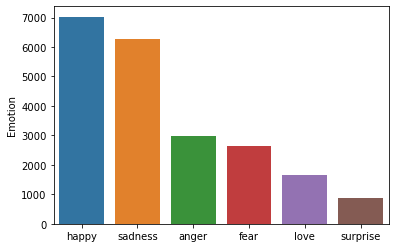

In [9]:
import seaborn as sns
sns.barplot(x=counts03.index.values, y= 'Emotion', data=counts03)

In [10]:
import copy
data_em_02_c01=copy.copy(data_em_01)
data_em_02_c01.info()
# Notre binarisation à travers des fonctions pandas
data_em_02_c01['category'] = data_em_02_c01['Emotion'].astype('category').cat.codes
data_em_02_c01.info()
data_em_02_c01.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21457 entries, 0 to 21456
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Text           21457 non-null  object
 1   Emotion        21457 non-null  object
 2   clean_content  21457 non-null  object
dtypes: object(3)
memory usage: 503.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21457 entries, 0 to 21456
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Text           21457 non-null  object
 1   Emotion        21457 non-null  object
 2   clean_content  21457 non-null  object
 3   category       21457 non-null  int8  
dtypes: int8(1), object(3)
memory usage: 524.0+ KB


,Text,Emotion,clean_content,category
0,i didnt feel humiliated,sadness,feel humiliated,4
1,i can go from feeling so hopeless to so damned...,sadness,feeling hopeless damned hopeful around someone...,4
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,3
4,i am feeling grouchy,anger,feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,sadness,feeling little burdened lately wasnt sure,4
6,ive been taking or milligrams or times recomme...,surprise,taking milligrams times recommended amount fal...,5
7,i feel as confused about life as a teenager or...,fear,feel confused life teenager jaded year old man,1
8,i have been with petronas for years i feel tha...,happy,petronas years feel petronas performed well ma...,2
9,i feel romantic too,love,feel romantic,3


In [11]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(CountVectorizer(ngram_range=(1, 2)), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    ## The silhouette score requires the full dataset
    #results += [
        #metrics.silhouette_score(data, estimator[-1].labels_,
      #                           metric="euclidean", sample_size=300,)
    #]

    # Show the results
    #formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                     #   "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [12]:
data=copy.copy(data_em_02_c01["clean_content"])
labels=copy.copy(data_em_02_c01['category'])
print(data.shape)
print(labels.shape)
n_labels=np.unique(labels).size
print(n_labels)

(21457,)
(21457,)
6


In [13]:
#(n_samples, n_features), n_labels = data.shape, np.unique(labels).size

#print(
 #   f"# labels: {n_labels}; # samples: {n_samples}; # features {n_features}"
#)

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n=5
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n*n_labels, n_init=n*4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n*n_labels, n_init=n*4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

#pca = PCA(n_components=n*n_labels).fit(data)
#kmeans = KMeans(init=pca.components_, n_clusters=n*n_labels, n_init=1)
#bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	35.526s	346078	0.016	0.016	0.016	0.007	0.014
random   	30.343s	347812	0.011	0.012	0.012	0.012	0.010
__________________________________________________________________________________
